In [1]:
file_path=r"C:\Users\ADMIN\Downloads\Real_Estate Data.xlsx"

In [2]:
pdimport pandas as  
import numpy as np

In [3]:
df=pd.read_excel(r"C:\Users\ADMIN\Downloads\Real_Estate Data.xlsx")

In [4]:
df

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the data is already in a DataFrame called 'df'

# Check missing values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Price in Millions                 1
Total TownShip Area in Acres    149
dtype: int64


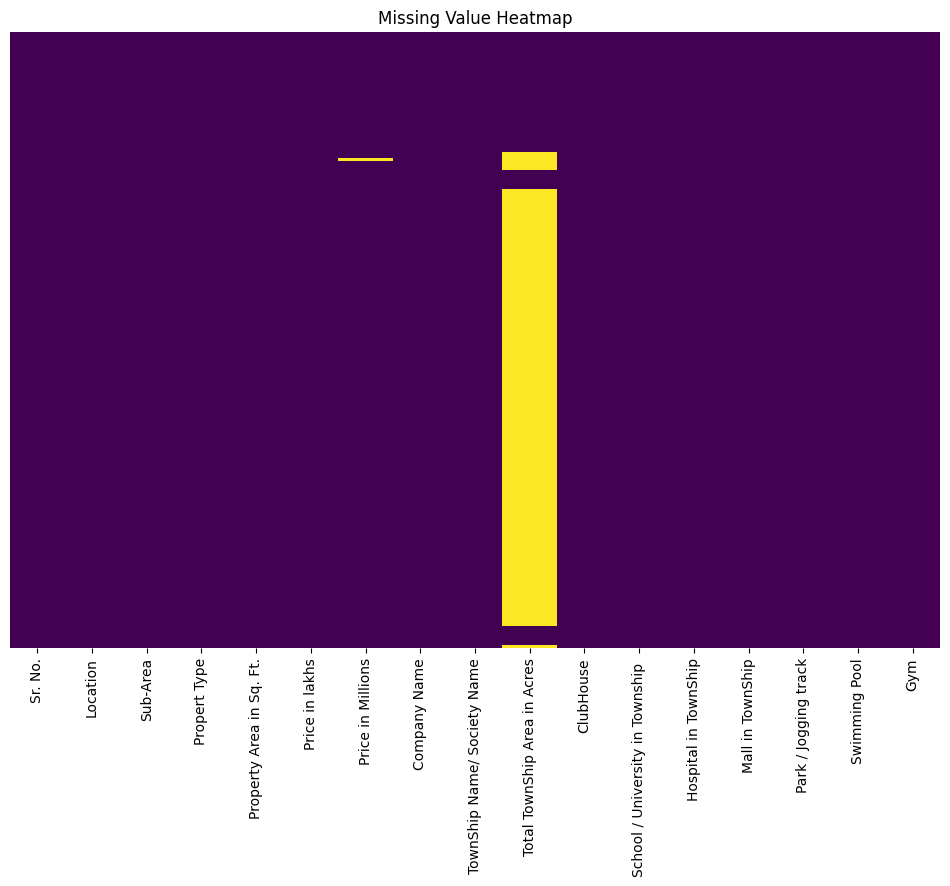

In [7]:
# Plot heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [8]:

def bool_to_int(x):
    return 1 if x == 'Yes' or x == 'yes' else 0


In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
# Convert all columns to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        if set(df[column].unique()) == {'Yes', 'No'} or set(df[column].unique()) == {'yes', 'no'}:
            df[column] = df[column].apply(bool_to_int)
        else:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))
    else:
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [11]:
df

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,0,5,0,71,51,3.900,13,36,1000.0,0,1,1,1,1,1,0
1,2,0,5,5,129,107,6.500,13,36,1000.0,0,1,1,1,1,1,0
2,3,0,5,15,159,120,7.400,13,36,1000.0,0,1,1,1,1,1,0
3,4,0,5,17,1,139,8.900,13,36,1000.0,0,1,1,1,1,1,0
4,5,0,12,11,122,120,7.400,4,9,100.0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,1,23,32,25,16.000,12,25,5.0,3,2,2,2,3,4,3
196,197,0,1,28,40,41,23.000,12,25,5.0,3,2,2,2,3,4,3
197,198,0,1,6,128,145,9.500,15,32,2.5,1,2,2,2,3,4,3
198,199,0,1,18,13,15,13.500,15,32,2.5,1,2,2,2,3,4,3


In [12]:
# Feature scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)


NameError: name 'numeric_columns' is not defined

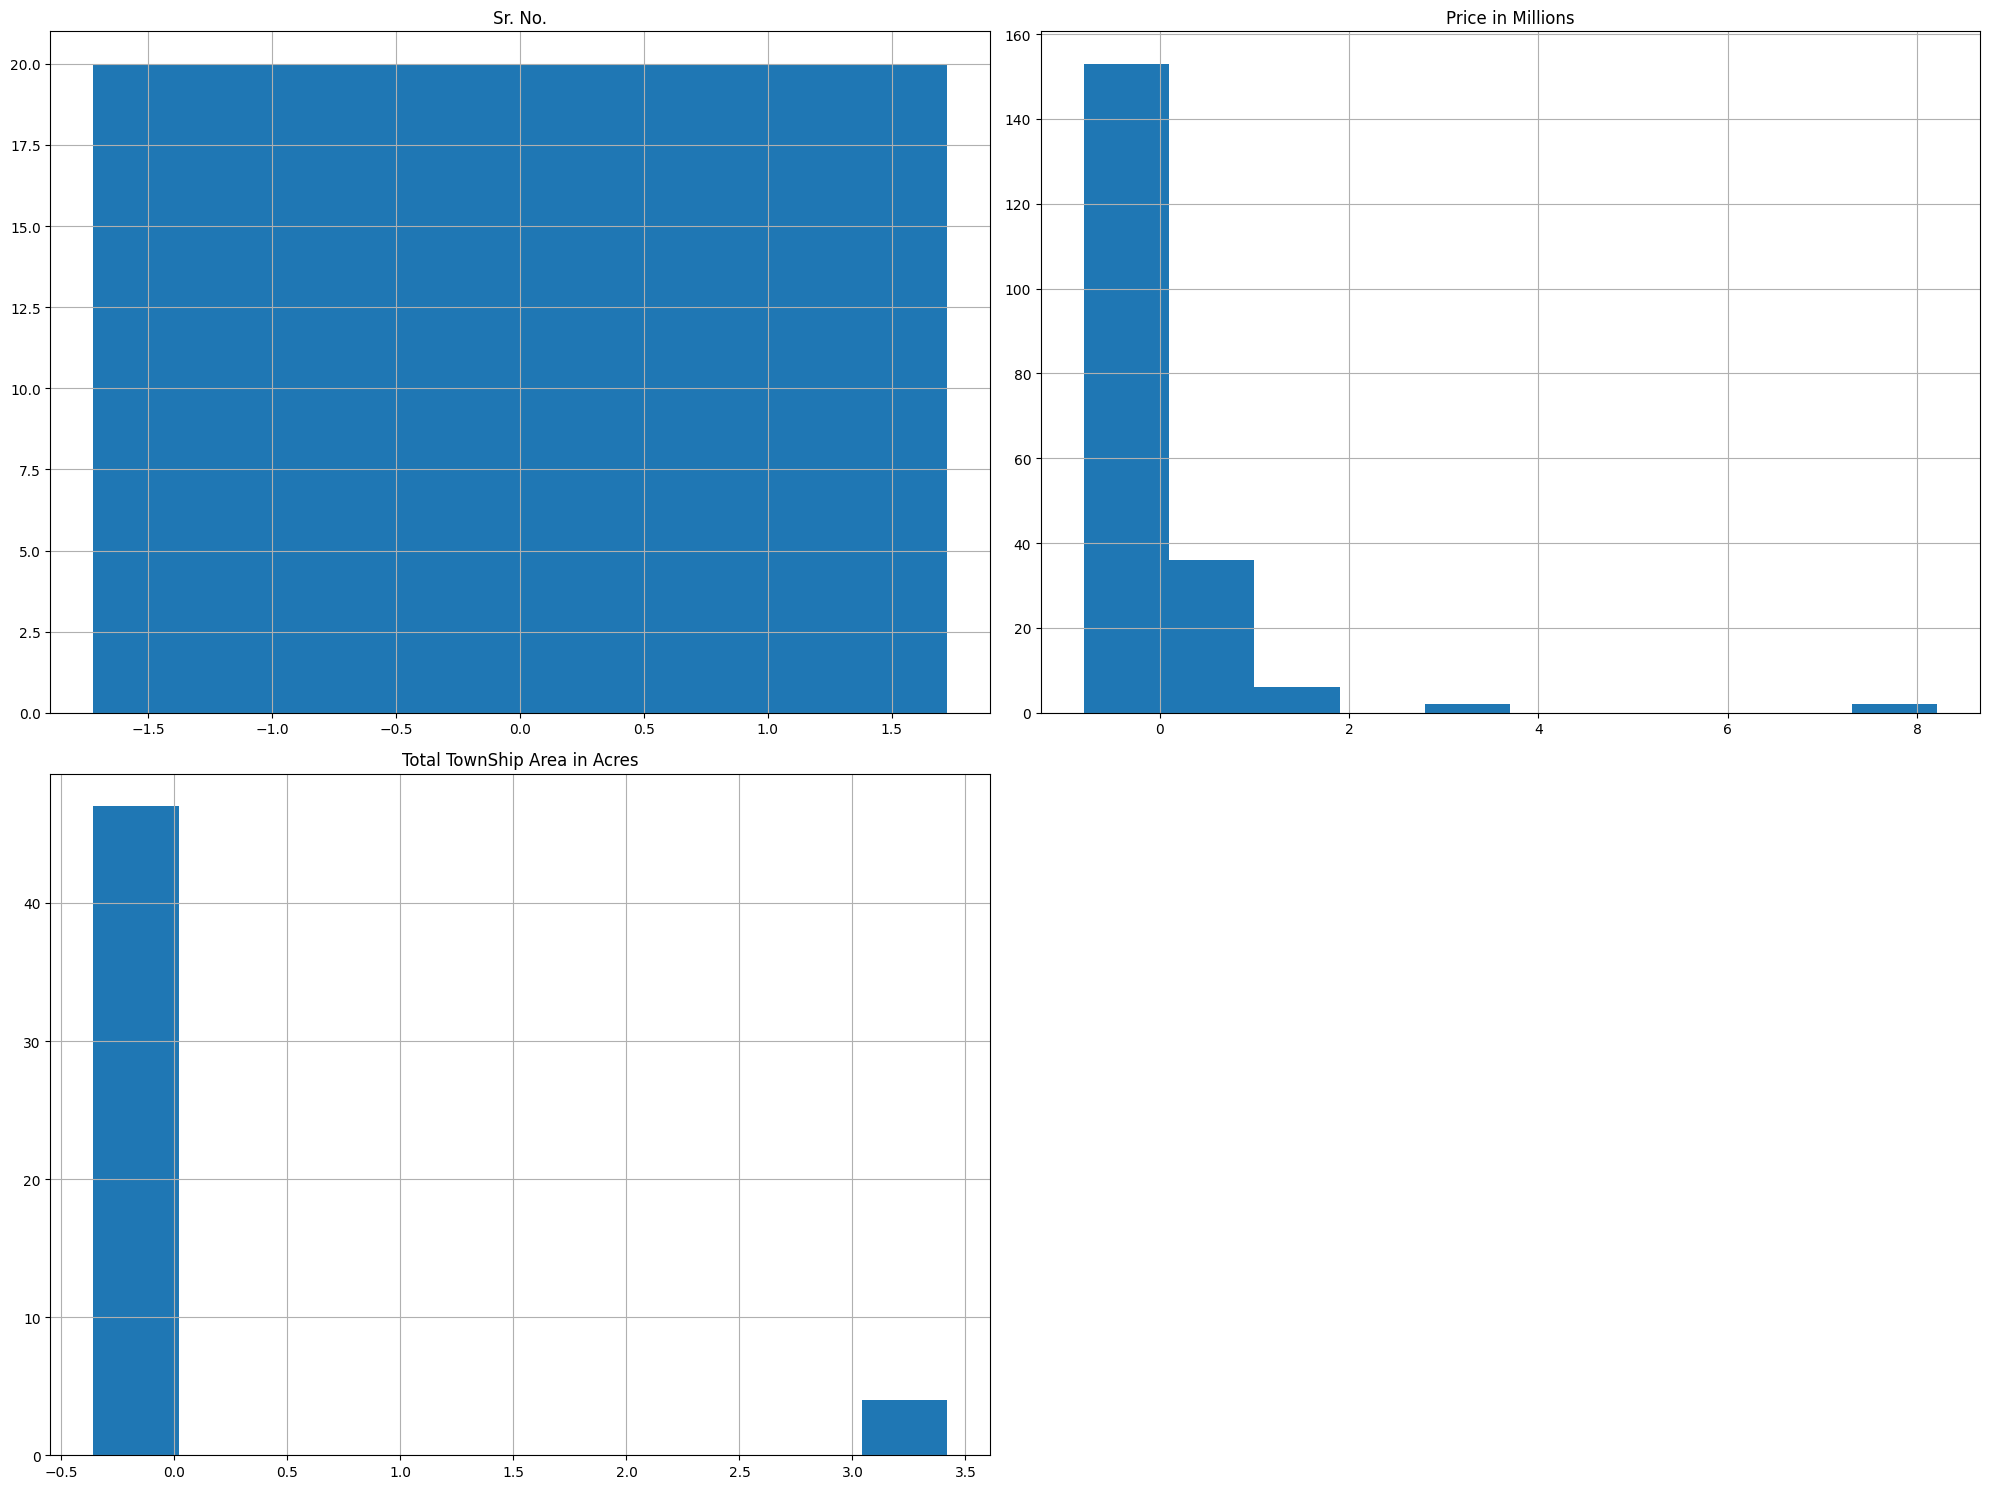

In [ ]:
# Plot histograms
df_scaled.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
# Selecting features (you may want to adjust this based on your analysis)
features = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres']
X = df[features]
y = df['Price in Millions']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
   Sr. No.  Location  Sub-Area  Propert Type  Property Area in Sq. Ft.  \
0        1         0         5             0                        71   
1        2         0         5             5                       129   
2        3         0         5            15                       159   
3        4         0         5            17                         1   
4        5         0        12            11                       122   

   Price in lakhs  Price in Millions  Company Name  \
0              51                3.9            13   
1             107                6.5            13   
2             120                7.4            13   
3             139                8.9            13   
4             120                7.4             4   

   TownShip Name/ Society Name  Total TownShip Area in Acres  ClubHouse  \
0                           36                        1000.0          0   
1                           36            

In [ ]:
df = df.dropna(subset=['Total TownShip Area in Acres'])


In [ ]:
# numeric and categorical columns
numeric_features = ['Property Area in Sq. Ft.', 'Total TownShip Area in Acres']
categorical_features = ['Location', 'Sub-Area', 'Company Name', 'TownShip Name/ Society Name']

#target variable
target = 'Price in Millions'


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


In [ ]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create linear regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())

])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.5)) 
])

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.5))  
])

elastic_net_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.5, l1_ratio=0.3))  # adjust alpha and l1_ratio
])



: 

In [ ]:
# Prepare the data
X = df.drop(target, axis=1)
y = df[target]


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit and predict using linear regression
lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)


In [ ]:
# Fit and predict using polynomial regression
poly_pipeline.fit(X_train, y_train)
poly_predictions = poly_pipeline.predict(X_test)


In [ ]:
# Print results
print("Linear Regression R2 Score:", r2_score(y_test, lr_predictions))
print("Polynomial Regression R2 Score:", r2_score(y_test, poly_predictions))


Linear Regression R2 Score: 0.2693751799446673
Polynomial Regression R2 Score: -1.0170515294984863


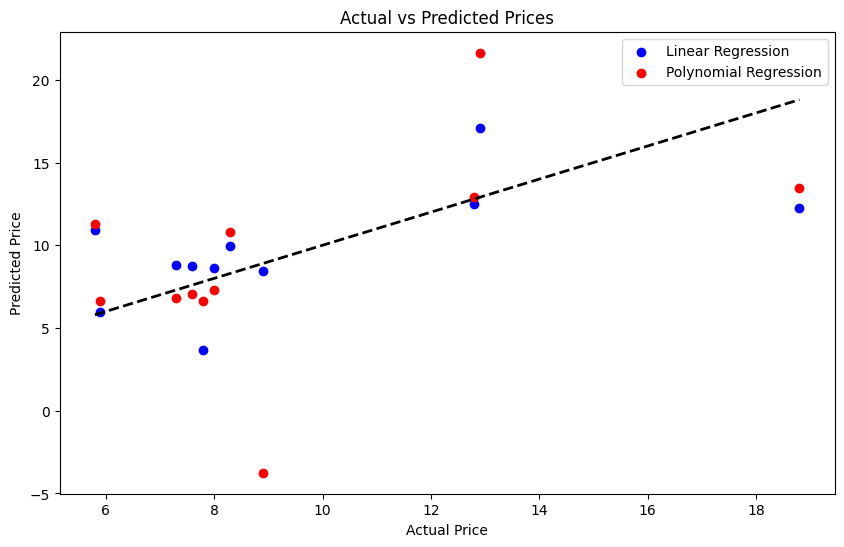

In [ ]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Linear Regression')
plt.scatter(y_test, poly_predictions, color='red', label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

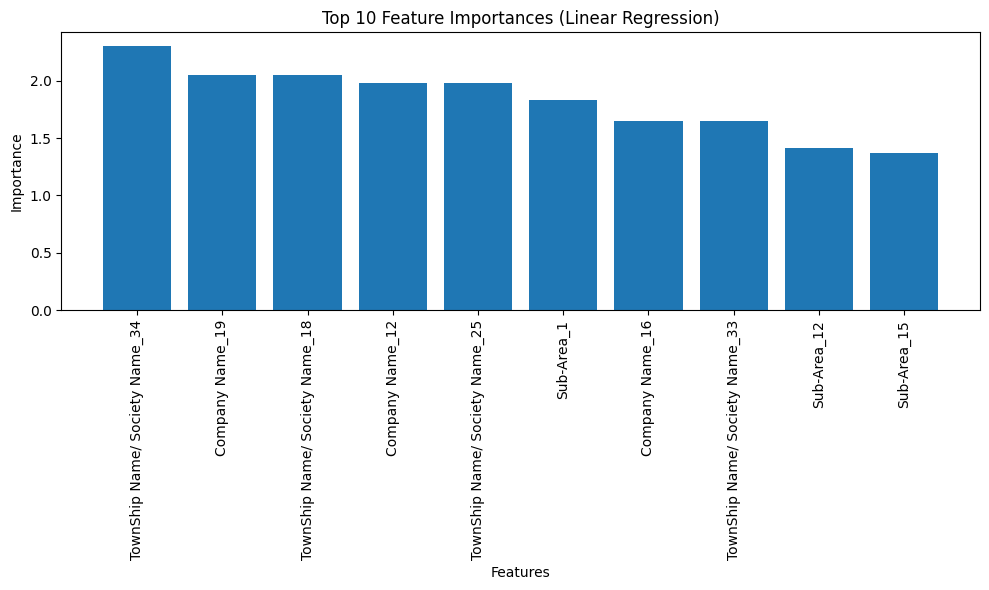

In [ ]:

# Feature importance for linear regression
feature_names = numeric_features.copy()
ohe = lr_pipeline.named_steps['preprocessor'].named_transformers_['cat']
if hasattr(ohe, 'get_feature_names_out'):
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
elif hasattr(ohe, 'get_feature_names'):
    cat_feature_names = ohe.get_feature_names(categorical_features)
else:
    cat_feature_names = [f"{feature}_{category}" for feature, categories in zip(categorical_features, ohe.categories_) for category in categories]

feature_names.extend(cat_feature_names)

coefficients = lr_pipeline.named_steps['regressor'].coef_
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (Linear Regression)')
plt.tight_layout()
plt.show()